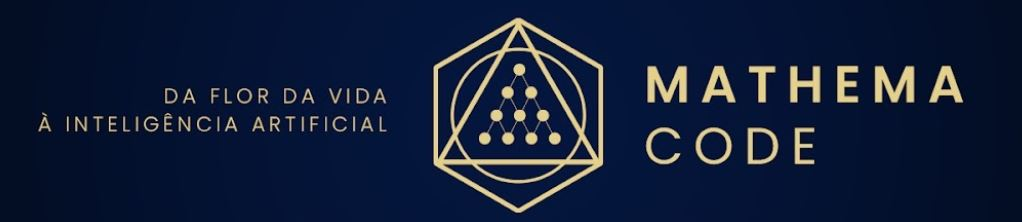

<font size=7>Aula 4 - Escala Ordinal</font>

In [ ]:
# (1) importar o Pandas


In [ ]:
# (2) seta Pandas para mostrar todas colunas do dataframe
pd.options.display.max_columns = None

In [ ]:
# (3) importar matplot lib e definir a impressão de gráficos para inline

%matplotlib inline

In [ ]:
# (4) importar dataset de candidatos
caminho_arquivo = 'datasets/candidatos_deputados_2014_final.csv'
candidatos =
candidatos

# Escala Ordinal
1. Rankeamento
    1. Lugar que terminou a competição (mas não sabemos dizer o quão rápido vc foi na corrida)
    2. Estatus sócio-economico


2. Ordem importa


3. Operações:
 - iguais ou diferentes
 - maior ou menor


4. Diferenças não podem ser medidas


5. Medições
    1. Mediana 
    2. Percentil (Percentile) 
    3. Nao se pode calcular a média porque a diferenca entre valores na escala não é sabido


6. Gráficos
    1. Barras

## Colunas com Dados Ordinais

In [ ]:
# (5) visualizando o número de valores únicos e os valores de cada coluna

unicos = candidatos.apply(lambda x: list(x.unique()))
nunicos = candidatos.nunique()
df_temp = pd.concat([nunicos, unicos], axis=1)
df_temp.columns = ['n_unicos', 'unicos']
df_temp

### Removendo colunas

In [ ]:
# (1) remover a coluna 'COD_GRAU_INSTRUCAO'


In [ ]:
# (2) lista todas as colunas "SETOR_"
cols = [c for c in candidatos.columns if c.startswith('SETOR_')]
cols

In [ ]:
# (3) remove todas colunas da lista
candidatos.drop(columns=cols, inplace=True)

In [ ]:
# (4) listar colunas para verificar se foram removidas
candidatos.columns

### Criar uma nova coluna com códigos numéricos para cada grau de instrução

In [ ]:
# (1) mostrar os valores únicos da coluna DESCRICAO_GRAU_INSTRUCAO
candidatos['DESCRICAO_GRAU_INSTRUCAO']

In [ ]:
# (2) quantidade de valores únicos na coluna DESCRICAO_GRAU_INSTRUCAO
candidatos['DESCRICAO_GRAU_INSTRUCAO']

In [ ]:
# (3) mostrar quantidade e distribuição da frequência dos candidatos para cada DESCRICAO_GRAU_INSTRUCAO
qtde = candidatos['DESCRICAO_GRAU_INSTRUCAO'].value_counts(dropna=False)
freq = candidatos['DESCRICAO_GRAU_INSTRUCAO'].value_counts(normalize=True, dropna=False)
freq = (freq * 100).round(0)

df_temp = pd.concat([qtde, freq], axis=1)
df_temp.columns = ['Qtde', 'Freq']


df_temp

In [ ]:
# (4) criar dicionário categoria : valor
mapa = {'SUPERIOR COMPLETO' : 7,
        'SUPERIOR INCOMPLETO': 6,
        'ENSINO MÉDIO COMPLETO': 5,
        'ENSINO MÉDIO INCOMPLETO': 4,
        'ENSINO FUNDAMENTAL COMPLETO': 3,
        'ENSINO FUNDAMENTAL INCOMPLETO': 2,
        'LÊ E ESCREVE': 1}
mapa

In [ ]:
# (5) criar coluna CODIGO_GRAU_INSTRUCAO com o auxílio do dicionário
candidatos['CODIGO_GRAU_INSTRUCAO'] = candidatos['DESCRICAO_GRAU_INSTRUCAO']

In [ ]:
# (6) mostrar 5 amostras das colunas  
# DESCRICAO_GRAU_INSTRUCAO e CODIGO_GRAU_INSTRUCAO
candidatos[['DESCRICAO_GRAU_INSTRUCAO', 'CODIGO_GRAU_INSTRUCAO']]

In [ ]:
# (7) remover dos duplicados e ver todas DESCRICAO_GRAU_INSTRUCAO e CODIGO_GRAU_INSTRUCAO distintos
candidatos[['DESCRICAO_GRAU_INSTRUCAO', 'CODIGO_GRAU_INSTRUCAO']]

In [ ]:
# (8) mostrar quantidade e distribuição da frequência dos candidatos para cada DESCRICAO_GRAU_INSTRUCAO
qtde = candidatos['DESCRICAO_GRAU_INSTRUCAO'].value_counts(dropna=False)
freq = candidatos['DESCRICAO_GRAU_INSTRUCAO'].value_counts(normalize=True, dropna=False)
freq = (freq * 100).round(0)

df_temp = pd.concat([qtde, freq], axis=1)
df_temp.columns = ['Qtde', 'Freq']

df_temp['CODIGO_GRAU_INSTRUCAO'] = df_temp.index.map(mapa)
df_temp.sort_values('CODIGO_GRAU_INSTRUCAO', inplace=True)

df_temp

### Criar coluna ordinal a partir de coluna razão

Usando a coluna `IDADE_DATA_ELEICAO`, classificaremos os candidatos em:

|idade|categoria texto|código categoria|
|-----|---------|-----|
|0-3 |bebê|1|
|4-11 |criança|2|
|12-17|adolescente|3|
|18-30 |jovem|4|
|31-40 |adulto|5|
|41-64 |maduro|6|
|65-100 |sênior|7|
|101-... |matusa|8|

In [ ]:
# (1) plotar histograma da coluna IDADE_DATA_ELEICAO
candidatos['IDADE_DATA_ELEICAO']

In [ ]:
# (2) criar lista de bins
bins = [0, 4, 12, 18, 31, 41, 65, 101, float('inf')]
bins

In [ ]:
# (3) criar lista de rótulos
categoria = ['bebê', 'criança', 'adolescente', 'jovem', 'adulto', 'maduro', 'sênior', 'matusa']

In [ ]:
# (4) visualizar 5 primeiras linhas
candidatos['IDADE_DATA_ELEICAO'].head()

In [ ]:
# (5) aplicar pd.cut para criar a coluna IDADE_DATA_ELEICAO_CAT
candidatos['IDADE_CAT'] = 

In [ ]:
# (6) exibir dataframe com 5 amostras (sample) das colunas 
# IDADE_DATA_ELEICAO e IDADE_DATA_ELEICAO_CAT
candidatos[['IDADE_DATA_ELEICAO', 'IDADE_CAT']].head()

### Exercícios



a) Remover a coluna `SEQUENCIAL_CANDIDATO`.

b) Remover as colunas `TP_RECEITA_*`.

c) Remover as colunas `*_COR_RACA`

d) Criar a coluna `REGIAO` a partir da coluna `SIGLA_UF`:

In [ ]:
# mapa UF - REGIÃO
mapa = {
    'AC': 'N',
    'AL': 'NE',
    'AM': 'N',
    'AP': 'N',
    'BA': 'NE',
    'CE': 'NE',
    'DF': 'CO',
    'ES': 'SE',
    'GO': 'CO',
    'MA': 'NE',
    'MG': 'SE',
    'MS': 'CO',
    'MT': 'CO',
    'PA': 'N',
    'PB': 'NE',
    'PE': 'NE',
    'PI': 'NE',
    'PR': 'S',
    'RJ': 'SE',
    'RN': 'NE',
    'RO': 'N',
    'RR': 'N',
    'RS': 'S',
    'SC': 'S',
    'SE': 'NE',
    'SP': 'SE',
    'TO': 'NE'} 

In [ ]:
# criar a coluna REGIAO usando a coluna SIGLA_UF

e) Criar a coluna `RECEITA_CAT` a partir da coluna `VALOR_RECEITA`:

| Receita | Categoria |
|---------|-----------|
|até 4.999|  Baixa    | 
|5.000 à 14.999| Média |
|à partir de 15.000 | Alta |

In [ ]:
# plotar histograma da coluna

In [ ]:
# criar lista de bins

In [ ]:
# criar lista de rótulos

In [ ]:
# visualizar head

In [ ]:
# aplicar pd.cut para criar a coluna de categorias

In [ ]:
# exibir dataframe com 5 amostras (sample) das colunas 
# razão e ordinal

## Medições

In [ ]:
# (1) mostrando todos CODIGO_GRAU_INSTRUCAO e sua descrição
candidatos[['DESCRICAO_GRAU_INSTRUCAO', 'CODIGO_GRAU_INSTRUCAO']]

### Contagem

In [ ]:
# (1) contar os valores de cada categoria DESCRICAO_GRAU_INSTRUCAO
candidatos['DESCRICAO_GRAU_INSTRUCAO']

### Distribuição da frequência

In [ ]:
# (1) mostrar a distribuição de frequência cada categoria de DESCRICAO_GRAU_INSTRUCAO
candidatos['DESCRICAO_GRAU_INSTRUCAO']

In [ ]:
# (2) cria coluna de frequência acumulada
freq = candidatos['DESCRICAO_GRAU_INSTRUCAO'].value_counts(dropna=False, normalize=True).rename('FREQ')
cods = candidatos[['DESCRICAO_GRAU_INSTRUCAO', 'CODIGO_GRAU_INSTRUCAO']].drop_duplicates().set_index('DESCRICAO_GRAU_INSTRUCAO')
df_temp = pd.concat([freq, cods], axis=1).sort_values('CODIGO_GRAU_INSTRUCAO', ascending=False)
df_temp['FREQ_CUM'] = df_temp['FREQ'].cumsum() 
df_temp['%FREQ_CUM'] = (df_temp['FREQ_CUM'] * 100).round(0)
df_temp

### Moda

Elemento mais frequente

In [ ]:
candidatos['CODIGO_GRAU_INSTRUCAO']

### Mediana

É o elemento que está no centro do conjunto ordenado crescentemente. 

#### Demonstração

In [ ]:
# (1) obtém total de elementos da coluna CODIGO_GRAU_INSTRUCAO
n_elementos = candidatos['CODIGO_GRAU_INSTRUCAO'].shape[0]
n_elementos

In [ ]:
# (2) calculando posição da mediana
idx = int(n_elementos * 0.5)    
idx

In [ ]:
# (3) mostrando mediana
mediana = candidatos['CODIGO_GRAU_INSTRUCAO'].sort_values().iloc[idx]
mediana

#### Método próprio

In [ ]:
mediana = candidatos['CODIGO_GRAU_INSTRUCAO']
mediana

**Interpretação:**

**50%** dos candidatos **tem ao menos** o **ensino superior incompleto** (6)

### Quartil

Valor que divide o conjunto ordenado em quatro parte iguais (em relação ao número de dados).

- **Primeiro Quartil (Q1):** é o elemento na posição que corresponde à **25%** da população
- **Primeiro Quartil (Q2):** é o elemento na posição que corresponde à **50%** da população
- **Primeiro Quartil (Q3):** é o elemento na posição que corresponde à **75%** da população

In [ ]:
# (1) obtendo o valor do 1º quartil
candidatos['CODIGO_GRAU_INSTRUCAO']

In [ ]:
# (2) obtendo o valor dos 3 quartis
candidatos['CODIGO_GRAU_INSTRUCAO']

**Interpretação:**

- **75%**(100-25) dos candidatos **tem ao menos** o **ensino médio completo** (5)
- **50%** dos candidatos **tem ao menos** o **ensino superior incompleto** (6)
- **25%**(100-75)  dos candidatos **tem ao menos** o **ensino superior completo** (7)

In [ ]:
# (3) obtendo outros percentis (.05, .95)
candidatos['CODIGO_GRAU_INSTRUCAO']

### Exercícios

In [ ]:
# cria dicionário (mapa) para numerar as categorias
categorias =  ['bebê', 'criança', 'adolescente', 'jovem', 'adulto', 'maduro', 'sênior', 'matusa']
mapa = {k:v for v, k in enumerate(categorias)}
mapa

a) Use o mapa para criar a coluna `COD_IDADE_CAT`

b) Mostre as colunas `IDADE_CAT` e `COD_IDADE_CAT`

c) Crie um dataframe com as colunas:
- QTDE: quantidade dos elementos da categoria
- FREQ: frequência dos elementos da categoria
- FREQ_CUM: frequência acumulada dos elementos da categoria
- %FREQ_CUM: percentual da frequência acumulada dos elementos da categoria

a partir coluna `COD_IDADE_CAT`

d) Obtenha a moda de `COD_IDADE_CAT`

e) Obtenha a mediana de `COD_IDADE_CAT`

f) Obtenha os quartis Q1, Q2 e Q3 de `COD_IDADE_CAT`

## Gráficos 

In [ ]:
# (1) plotar gráfico de barras das quantidades de 'CODIGO_GRAU_INSTRUCAO'
candidatos['CODIGO_GRAU_INSTRUCAO'].value_counts().sort_index()

In [ ]:
# (2) plotar gráfico de barras das quantidades de 'DESCRICAO_GRAU_INSTRUCAO'
candidatos['DESCRICAO_GRAU_INSTRUCAO'].value_counts(normalize=True)

In [ ]:
# (3) cria tabela de contingência de SIGLA_UF por DESCRICAO_GRAU_INSTRUCAO
tab_ctg = pd.crosstab(
    candidatos['SIGLA_UF'],
    candidatos['DESCRICAO_GRAU_INSTRUCAO'],
    margins=True,
    margins_name='TOTAL')

tab_ctg.sort_values('TOTAL', inplace=True)
tab_ctg

In [ ]:
# (4) plotar um gráfico de barras agrupadas da tabela de contingência dos 5 estados com mais candidatos
# tab_ctg.tail().plot.bar(figsize=(16,4)); # plota, mas aparece as colunas e linhas TOTAL
tab_ctg.iloc[-5:-1,:-1].plot.bar(figsize=(16,4));

In [ ]:
# (5) plota um gráfico de barras empilhadas da tabela de contingência
tab_ctg.iloc[-5:-1,:-1].plot.bar(???????????????????, figsize=(16,4));

In [ ]:
# (6) plota um gráfico de barras da tabela de contingência, com um gráfico por DESCRICAO_GRAU_INSTRUCAO
tab_ctg.iloc[-5:-1,:-1].plot.bar(?????????????????, figsize=(8,16));

# Strings

In [ ]:
from unidecode import unidecode

In [ ]:
# (1) cria a coluna NOME_CANDIDATO_TRATADO (tudo em maiúsculo, sem acentos e cedilha e sem preposições)
candidatos['NOME_CANDIDATO_TRATADO'] = (
    candidatos['NOME_CANDIDATO']
    ?????????????????????????????????????
    .str.upper()
    .replace('\sD[AEIOU]S?\s', ' ', regex=True)
)

In [ ]:
# (2) cria a coluna COD_NOME_CANDIDATO, que substitui cada nome por um valor numérico
candidatos['COD_NOME_CANDIDATO'] = candidatos['NOME_CANDIDATO'].factorize()[0]
candidatos[['NOME_CANDIDATO', 'COD_NOME_CANDIDATO']]

In [ ]:
# (3) cria filtro de nomes duplicados
filtro = candidatos['NOME_CANDIDATO_TRATADO']
filtro

In [ ]:
# (4) mostra apenas linhas com nomes duplicados
candidatos[filtro].sort_values('NOME_CANDIDATO_TRATADO').head(60)

In [ ]:
# (5) cria coluna PRIMEIRO_NOME
candidatos['PRIMEIRO_NOME'] = candidatos['NOME_CANDIDATO_TRATADO']

In [ ]:
# (6) cria coluna SOBRENOME
def join(x):   
    r = ' '.join(x.dropna().iloc[1:])
    return r
candidatos['SOBRENOME'] = candidatos['NOME_CANDIDATO_TRATADO'].str.split(expand=True).apply(join, axis=1)

In [ ]:
# (7) cria uma coluna com a quantidade de nomes do candidato
candidatos['NUM_NOMES'] = candidatos['NOME_CANDIDATO_TRATADO'].str.split()

In [ ]:
# (8) mostra tabela com todas colunas relacionadas a 'NOME'
candidatos.filter(regex='NOME')

In [ ]:
# (9) mostra os 10 nomes mais comuns
candidatos['PRIMEIRO_NOME'].value_counts().head(10)

In [ ]:
# (10) filtra todos com JUNIOR no nome
filtro = candidatos['NOME_CANDIDATO_TRATADO'].str.contains('JUNIOR$')
filtro

In [ ]:
# (11) mostra só nomes que possuem JUNIOR no final
candidatos.loc[filtro, cols_nomes]

In [ ]:
# (12) mostra só nomes com JUNIOR no meio do nome
filtro = candidatos['NOME_CANDIDATO_TRATADO'].str.contains(' JUNIOR ')
candidatos.loc[filtro, cols_nomes]

In [ ]:
# (13) mostra os 20 sobrenomes mais comuns
candidatos['SOBRENOME'].str.split().explode().value_counts().head(20)

## Exercícios

a) Mostre os 30 "segundos nomes" mais comuns **entre as pessoas que possuem mais de 2 nomes**.

b) Mostre os registros dos candidatos que possuem nome que termina com "FILHO".

c) Mostre os registros dos candidatos que contém "FILHO" no meio do nome.

d) Trate a coluna `DESCRICAO_OCUPACAO` removendo acentos e colocando todos os textos em minúsculos

# Agrupamentos

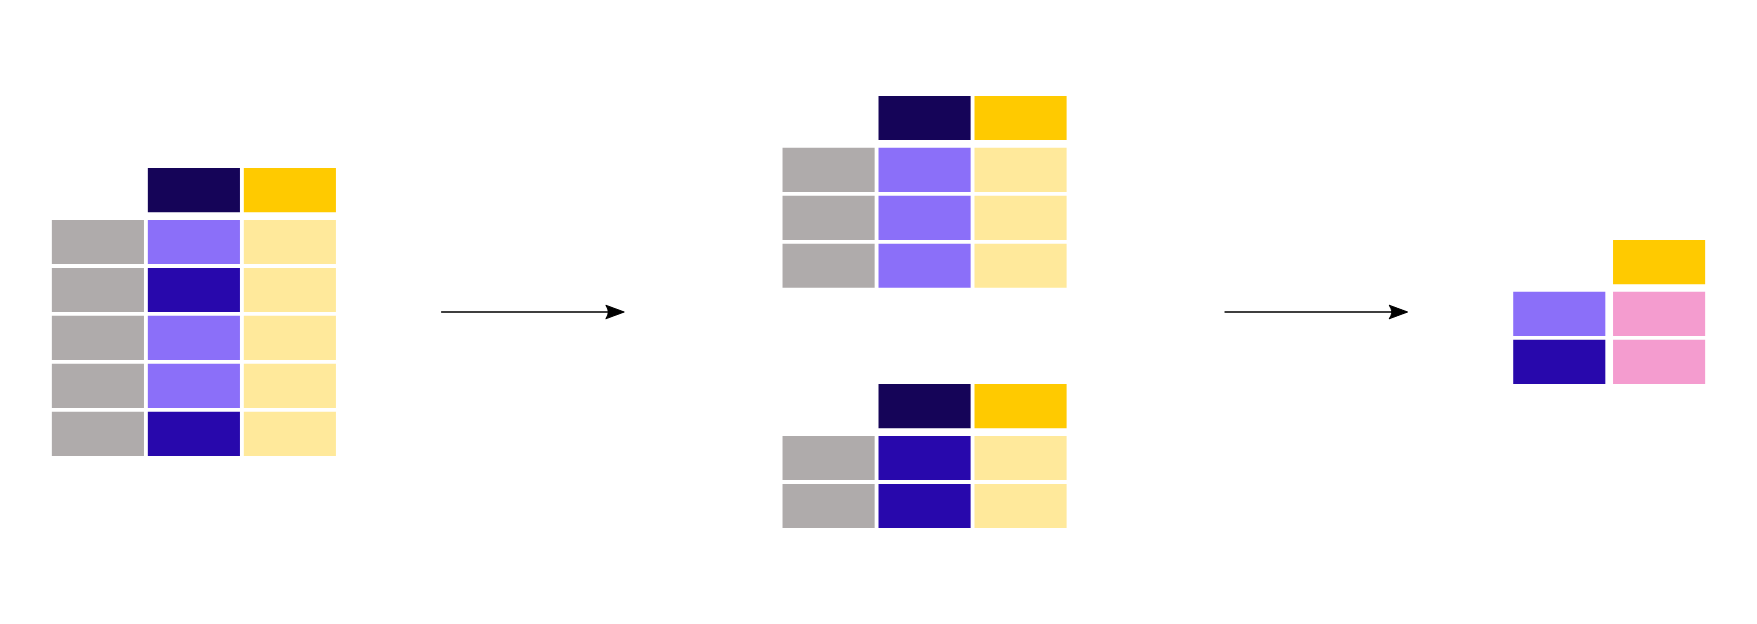

Muitas vezes precisamos **diminuir a granularidade** dos dados **agrupando** os registros (linhas) conforme alguns critérios e então **sumarizando** algumas colunas, a fim de obter uma visão geral dos dados.

## Agrupamento por 1 coluna e agregação de 1 coluna

In [ ]:
# (1) adicionando suffixo K e M ao VALOR_BEM para facilitar visualização
def convert(valor):    
    if pd.isna(valor) or abs(valor) < 1000: return valor
    if abs(valor) < 1e6: return f'{valor/1000:.1f}K'
    return f'{valor/1e6:.1f}M'

candidatos['VALOR_BEM_STR'] = candidatos['VALOR_BEM'].apply(convert)
candidatos['VALOR_BEM_STR']

In [ ]:
# (2) mostra os valores únicos da coluna 'DESC_SIT_TOT_TURNO'
candidatos['DESC_SIT_TOT_TURNO'].unique()

In [ ]:
# (3) cria coluna booleana 'ELEITO'
candidatos['ELEITO'] = candidatos['DESC_SIT_TOT_TURNO']
candidatos['ELEITO']

In [ ]:
# (4) mostra as 2 primeiras linhas do data frame
candidatos.head(2)

In [ ]:
# (5) seleciona apenas os eleitos, agrupa por estado e calcula o valor médio de bens
(candidatos
 .query('ELEITO')
 .groupby('SIGLA_UF')
 ['VALOR_BEM'].mean()
 .apply(convert)
)

In [ ]:
# (6) verificando o tipos de sumarização 
dir(candidatos.groupby('NUMERO_PARTIDO')['CODIGO_GRAU_INSTRUCAO'])

In [ ]:
# (7) obtém o candidato mais rico de cada estado
(candidatos
 .sort_values('VALOR_BEM', ascending=False)
 .groupby('SIGLA_UF')
 .head(1)
 [['SIGLA_UF', 'NOME_CANDIDATO', 'VALOR_BEM_STR', 'NUMERO_PARTIDO']]
)

## Agrupamento por 1 coluna e 2 agregações de 1 coluna 

In [ ]:
# (8) seleciona apenas os eleitos, agrupa por estado e calcula o valor médio e o desvio padrão do valor dos bens
(candidatos
 .query('ELEITO')
 .groupby('SIGLA_UF')['VALOR_BEM']
 .agg(['mean', 'std'])
 .style.format(convert)
)

## Agrupamento por 2 colunas e agregação de 1 coluna

In [ ]:
# (9) seleciona apenas os eleitos, agrupa por estado e por cargo e calcula o valor médio do valor dos bens
df_temp = (
    candidatos
    .query('ELEITO')
    .groupby(['SIGLA_UF','DESCRICAO_CARGO'])
    ['VALOR_BEM'].mean()
)
df_temp

In [ ]:
# (10) olhando o tipo de index da série 
df_temp.index

In [ ]:
# (11) transforma os valores do index DESCRICAO_CARGO em colunas para comparar os valores por tipo de deputado
## (desempilha o index DESCRICAO_CARGO e transforma seus valores em coluna)
df_temp = df_temp.unstack(level='DESCRICAO_CARGO')
df_temp['DIFF'] = df_temp['DEPUTADO FEDERAL'] - df_temp['DEPUTADO ESTADUAL']
df_temp.style.format(convert)

## Agrupamento por 2 colunas e mais de uma agregação em mais de uma coluna

In [ ]:
# (12) seleciona apenas os eleitos, agrupa por estado e por cargo,
# calcula o valor médio, desvio padrão e mediana de bens
# e conta os números de únicos e obtém a moda de partidos
df_temp = (
    candidatos
    .query('ELEITO & DESCRICAO_CARGO != "DEPUTADO DISTRITAL"')
    .groupby(['SIGLA_UF','DESCRICAO_CARGO'])
    .agg(
        {'VALOR_BEM': ['mean','std', 'median'],
         'NUMERO_PARTIDO': ['nunique', 'mode']
        }
    )
)
df_temp

In [ ]:
# (13) OBS.: corrigindo o problema com o método "mode"

# seleciona apenas os eleitos, agrupa por estado e por cargo,
# calcula o valor médio, desvio padrão e mediana de bens
# e conta os números de únicos e obtém a moda de partidos

def calcular_moda(x):
    return list(x.mode())

df_temp = (
    candidatos
    .query('ELEITO & DESCRICAO_CARGO != "DEPUTADO DISTRITAL"')
    .groupby(['SIGLA_UF','DESCRICAO_CARGO'])
    .agg(
        {'VALOR_BEM': ['mean','std', 'median'],
         'NUMERO_PARTIDO': ['nunique', calcular_moda]
        }
    )
)
df_temp

In [ ]:
# (14) desempilha o index DESCRICAO_CARGO e transforma seus valores em coluna
df_temp2 = df_temp.unstack(level='DESCRICAO_CARGO')
df_temp2

In [ ]:
# (15) mostra o index do data frame desempilhado
df_temp2.index

In [ ]:
# (16) mostra as colunas do data frame desempilhado
df_temp2.columns